<a href="https://colab.research.google.com/github/Nech-C/pixel-art-diffusion/blob/main/diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision

In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize images to [-1, 1]
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

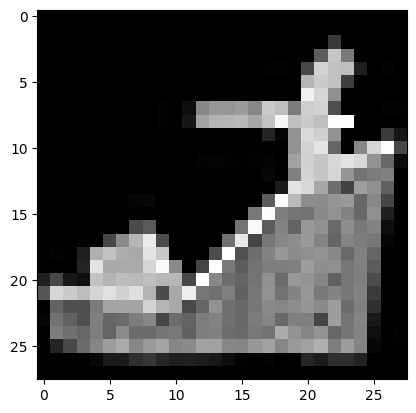

In [11]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    plt.imshow(img[0], cmap='gray')  # Display the first image in the batch

# Display an image
imshow(images[0])


In [5]:
def add_noise(images, noise_level=0.2):
    """
    Adds Gaussian noise to a batch of images.

    Args:
    images (torch.Tensor): Batch of images to which noise will be added.
    noise_level (float): Standard deviation of the Gaussian noise.

    Returns:
    torch.Tensor: Batch of images with added Gaussian noise.
    """
    noise = torch.randn_like(images) * noise_level
    noisy_images = images + noise
    return noisy_images.clamp(0, 1)  # Clamp the values to be between 0 and 1


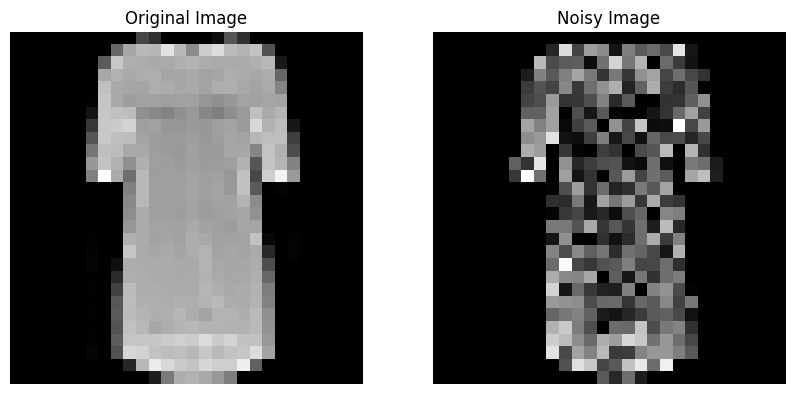

In [6]:
# Add noise to images
noisy_images = add_noise(images, noise_level=0.2)

# Visualize the first image in the batch, before and after adding noise
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axs[0].imshow(images[0][0], cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Noisy image
axs[1].imshow(noisy_images[0][0], cmap='gray')
axs[1].set_title('Noisy Image')
axs[1].axis('off')

plt.show()
